In [54]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from compute_engine_yolov5 import YoloV5ComputeEngine

image_0 = "/raid-dgx3/mviti/PatrolCare/train_data/patrolcare_v2/labels/PC_ROI_boxing_selected_16122021-batch-2-2021-12-22/reflets_2021_01_22T08_45_26_00_360.jpg"
image_1 = "/raid-dgx3/mviti/PatrolCare/train_data/patrolcare_v2/labels/PC_ROI_boxing_selected_16122021-batch-2-2021-12-22/reflets_2021_01_22T08_46_15_00_904.jpg"

# prepare batch
image_0 = cv2.imread(image_0)
image_1 = cv2.imread(image_1)
image_list = [image_0, image_1]

weights = "/home/mviti/gits/yolov5/runs/train/exp2/weights/best.pt"
device= 'cpu'
half = False
dnn = False
imgsz = (640,640) # inference image size
classes = None
agnostic_nms = False
conf_thres=0.25  # confidence threshold
iou_thres=0.45  # NMS IOU threshold
max_det=1000  # maximum detections per image

ce_yolov5 = YoloV5ComputeEngine(weights=weights, device=device, half=half, imgsz=imgsz, conf_thres=conf_thres, iou_thres=iou_thres, max_det=max_det, agnostic_nms=agnostic_nms)
ce_yolov5.load()
im = ce_yolov5.preprocess(image_list)
pred = ce_yolov5.process(im)
pred = ce_yolov5.postprocess(pred)


YOLOv5 🚀 2022-10-27 Python-3.7.13 torch-1.12.1+cu102 CPU

YOLOv5 🚀 2022-10-27 Python-3.7.13 torch-1.12.1+cu102 CPU

Fusing layers... 
Fusing layers... 
Model summary: 213 layers, 7018216 parameters, 0 gradients
Model summary: 213 layers, 7018216 parameters, 0 gradients


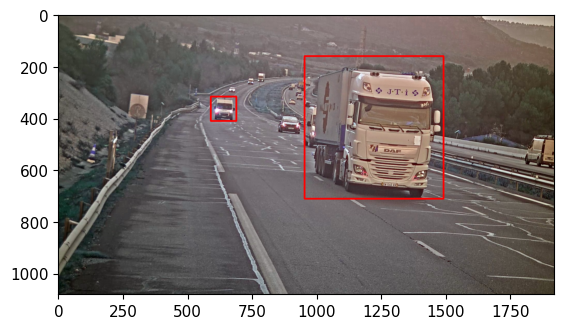

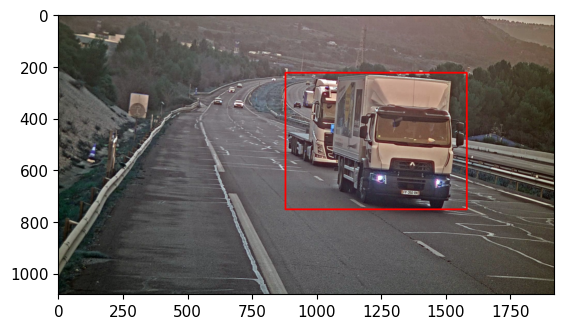

In [55]:
%matplotlib inline

src_size = ce_yolov5.imgsz
src_h,src_w = src_size
for image, det in zip(image_list, pred):
    dst_size = image.shape[:2]
    dst_h, dst_w = dst_size
    image_rect = np.copy(image)
    for *xyxy, conf, cls in reversed(det):
        
        bottom_right = [ xyxy[0].item(), xyxy[1].item() ][::-1]
        top_left = [ xyxy[2].item(), xyxy[3].item() ][::-1]
        
        bottom_right = int((bottom_right[0]/src_h)*dst_h), int((bottom_right[1]/src_w)*dst_w)
        top_left = int((top_left[0]/src_h)*dst_h), int((top_left[1]/src_w)*dst_w)
        
        bottom_right = bottom_right[::-1]
        top_left = top_left[::-1]
        
        image_rect = cv2.rectangle(image_rect, top_left, bottom_right,[255,0,0],5)
    plt.imshow(image_rect)
    plt.show()